# Libraries

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path=r'/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/df_instacart_visualizations.pkl'
print(path)
df_draft_instacart=pd.read_pickle(path)
path2=r'/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Original Data/departments 2.csv'
print(path2)
df_dep=pd.read_csv(path2, index_col=False)

/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/df_instacart_visualizations.pkl
/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Original Data/departments 2.csv


# Drop PII Data

In [11]:
df_draft_instacart.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,...,busiest_days,busy_order_times,busiest_period_of_the_day,max_order,loyalty_flag,avg_price,spending_flag,med_of_days_since_last_order,order_freq_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Average time,Average orders,8,New customer,7.666667,low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest time,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Busiest time,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Average time,Average orders,8,New customer,7.666667,low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Least busy days,Busiest time,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both


In [12]:
print(df_draft_instacart.columns)

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'marital_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'merge_check_ords', 'product_name', 'aisle_id', 'department_id',
       'prices', 'merge_prior_order_check', 'price_range_loc', 'busiest_days',
       'busy_order_times', 'busiest_period_of_the_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag',
       'med_of_days_since_last_order', 'order_freq_flag', '_merge'],
      dtype='object')


In [13]:
#the first_name and last_name columns are considered to be Personal identfiable information 
df_draft_instacart= df_draft_instacart.drop(columns = ['first_name'])

In [14]:
df_draft_instacart=df_draft_instacart.drop(columns = ['last_name'])

In [15]:
#error in column name
df_draft_instacart=df_draft_instacart.rename(columns={'n_dependants':'number_of_dependents'})

In [16]:
df_draft_instacart.head()

,user_id,gender,state,age,date_joined,number_of_dependents,marital_status,income,order_id,order_number,...,busiest_days,busy_order_times,busiest_period_of_the_day,max_order,loyalty_flag,avg_price,spending_flag,med_of_days_since_last_order,order_freq_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Average time,Average orders,8,New customer,7.666667,low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Busiest time,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Busiest time,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Average time,Average orders,8,New customer,7.666667,low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Least busy days,Busiest time,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both


In [17]:
#assigning outliers as NaN values
df_draft_instacart.loc[df_draft_instacart['prices'] >100, 'prices'] = np.nan

# Difference in Spending Habits Per Region

In [18]:
#Assigning each state to a region. 1=Northeast, 2=Midwest, 3=South, 4=West
df_draft_instacart.loc[df_draft_instacart['state'].isin(['Maine','New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island','Connecticut', 'New York', 'Pennsylvania', 'New Jersey',]), 'region']=1
df_draft_instacart.loc[df_draft_instacart['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri',]), 'region']=2
df_draft_instacart.loc[df_draft_instacart['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana',]), 'region']=3
df_draft_instacart.loc[df_draft_instacart['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii',]), 'region']=4
                                                          

In [19]:
#count of low and high spenders per region
df_draft_instacart.groupby('region').spending_flag.value_counts(dropna=False)

region  spending_flag
1.0     low spender       5624898
        high spender        97838
2.0     low spender       7457770
        high spender       139555
3.0     low spender      10605499
        high spender       186386
4.0     low spender       8151900
        high spender       141013
Name: spending_flag, dtype: int64

In [20]:
#find NaN states
df_draft_instacart[df_draft_instacart['region'].isnull()]

,user_id,gender,state,age,date_joined,number_of_dependents,marital_status,income,order_id,order_number,...,busy_order_times,busiest_period_of_the_day,max_order,loyalty_flag,avg_price,spending_flag,med_of_days_since_last_order,order_freq_flag,_merge,region


In [21]:
#create a crosstab between the region and spending_flag columns
region_spending=pd.crosstab(df_draft_instacart['region'], df_draft_instacart['spending_flag'], dropna=False)

In [22]:
#view crosstab
region_spending

spending_flag,high spender,low spender
region,,
1.0,97838,5624898
2.0,139555,7457770
3.0,186386,10605499
4.0,141013,8151900


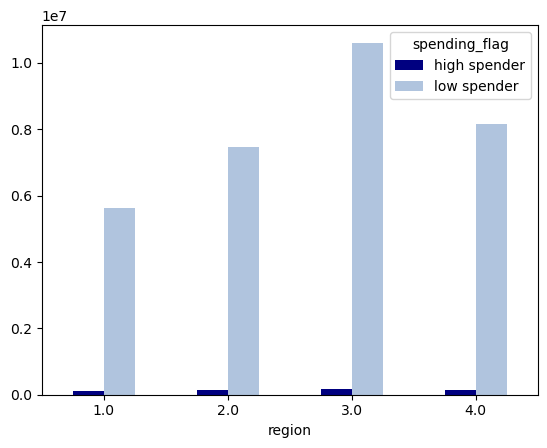

In [23]:
#graph to show count of type of spenders in each region
region_spending_bar = region_spending.plot.bar(rot = 0, color = ['navy', 'lightsteelblue'])

Region one has the least amount of spenders and region 3 has the most. region 2 and 4 have similair counts of customers in regards to their spending habits 

In [24]:
#export
region_spending_bar.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/region_spending_bar.png'))

# Flag Low-Activity Customers

In [25]:
#create a low-activity flag
df_draft_instacart.loc[df_draft_instacart['max_order'] >=5, 'activity_flag'] = 'regular activity'
df_draft_instacart.loc[df_draft_instacart['max_order'] <5, 'activity_flag'] = 'low activity'

In [26]:
df_draft_instacart['activity_flag'].value_counts(dropna=False)

regular activity    30964564
low activity         1440295
Name: activity_flag, dtype: int64

In [27]:
#create the exclusion flag, filtering out low activity customers
df_active_users=df_draft_instacart[df_draft_instacart['activity_flag']=='regular activity']

In [28]:
df_active_users.head()

,user_id,gender,state,age,date_joined,number_of_dependents,marital_status,income,order_id,order_number,...,busiest_period_of_the_day,max_order,loyalty_flag,avg_price,spending_flag,med_of_days_since_last_order,order_freq_flag,_merge,region,activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Average orders,8,New customer,7.666667,low spender,19.0,Regular customer,both,2.0,regular activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both,2.0,regular activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both,2.0,regular activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Average orders,8,New customer,7.666667,low spender,19.0,Regular customer,both,2.0,regular activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both,2.0,regular activity


In [29]:
#export
df_active_users.to_pickle(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/df_active_users.plk'))

In [98]:
df_active_users.shape

(30964564, 35)

# Customer Demographic Profiling 

In [30]:
#descriptive statistics on relevant columns
df_draft_instacart[['age', 'income', 'number_of_dependents']].describe()

,age,income,number_of_dependents
count,3.240486e+07,3.240486e+07,3.240486e+07
mean,4.946527e+01,9.943773e+04,1.501896e+00
std,1.848558e+01,4.305727e+04,1.118865e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.700400e+04,1.000000e+00
50%,4.900000e+01,9.661800e+04,2.000000e+00
75%,6.500000e+01,1.279120e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [31]:
df_dep

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [32]:
df_draft_instacart.head()

,user_id,gender,state,age,date_joined,number_of_dependents,marital_status,income,order_id,order_number,...,busiest_period_of_the_day,max_order,loyalty_flag,avg_price,spending_flag,med_of_days_since_last_order,order_freq_flag,_merge,region,activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Average orders,8,New customer,7.666667,low spender,19.0,Regular customer,both,2.0,regular activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both,2.0,regular activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both,2.0,regular activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Average orders,8,New customer,7.666667,low spender,19.0,Regular customer,both,2.0,regular activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.666667,low spender,19.0,Regular customer,both,2.0,regular activity


In [33]:
print(df_draft_instacart.columns)

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'merge_check_ords', 'product_name', 'aisle_id', 'department_id',
       'prices', 'merge_prior_order_check', 'price_range_loc', 'busiest_days',
       'busy_order_times', 'busiest_period_of_the_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag',
       'med_of_days_since_last_order', 'order_freq_flag', '_merge', 'region',
       'activity_flag'],
      dtype='object')


In [34]:
#create flags for demographics such as: new parent, young adult, adult, elder, single adult, single parent, partnered parent, retired adult
df_draft_instacart.loc[(df_draft_instacart['department_id']==18)
                       &(df_draft_instacart['number_of_dependents']>=1), 'profile']='New parent'

df_draft_instacart.loc[(df_draft_instacart['age']>=18)
                       & (df_draft_instacart['age']<40), 'profile']='young adult'

df_draft_instacart.loc[(df_draft_instacart['age']>=65), 'profile']='senior'

df_draft_instacart.loc[(df_draft_instacart['age']>=40)
                       & (df_draft_instacart['age']<65), 'profile']='middle age adult'

df_draft_instacart.loc[(df_draft_instacart['number_of_dependents']>=1)
                       & (df_draft_instacart['income']<=33000)
                       &(df_draft_instacart['gender']=='Female'), 'profile']='single mother'

df_draft_instacart.loc[(df_draft_instacart['number_of_dependents']>=1)
                       & (df_draft_instacart['income']<=51000)
                       &(df_draft_instacart['gender']=='Male'), 'profile']='single father'

df_draft_instacart.loc[(df_draft_instacart['number_of_dependents']>=1)
                       & (df_draft_instacart['income']>50000) 
                       & (df_draft_instacart['marital_status']=='married'), 'profile']='partnered parent'

df_draft_instacart.loc[(df_draft_instacart['number_of_dependents']==0)
                       & (df_draft_instacart['age']>=65), 'profile']='retired adult'
                                                                                                                
df_draft_instacart.loc[(df_draft_instacart['number_of_dependents']==0)
                       & (df_draft_instacart['age']<65)
                       &(df_draft_instacart['marital_status']=='single'), 'profile']='single adult'


In [35]:
#Explanation for each flag:

#New Parent:The combination of purchasing a baby formula and having more than one dependent most likely confirms that the user is a new parent 
#Young Adult: a young adult is considered to be someone between the ages 18-40
#Senior: Someone over the age of 65 is considered to be a senior
#Middle-Age Adult: someone between the ages of 40 and 65 is considered to be middle-aged
#Single Mother: The average income of a single mother in the US rounds up to $33,000 according to the Census Bereau. Other condictions set for thios profile is the female gender and having more than 1 dependent.
#Single Father: The average income of a single father rounds up to 51000 according to the Census Bereau. Other conditions applied to this the the mle gender and having more than 1 dependent  
#Partnered Parent: A partnered parent is someone who have the conditions of having more than one dependent, is married and having an income of more than $50,000
#Retired Adult: A retired adult is over 65 years of age and having zero dependents.
#Single Adult: Has no dependents, is not a senior, and has the marrage status of single. 


# Visualization of the profile Data Distribution

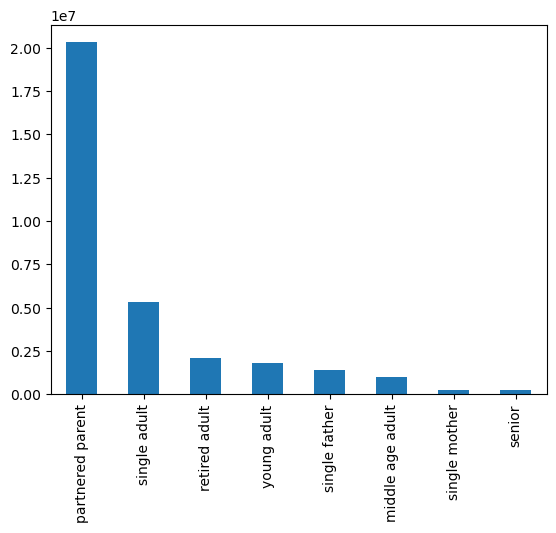

In [36]:
#distribution of prefile count bar graph
profile_distribution_count_bar=df_draft_instacart['profile'].value_counts().plot.bar()

In [57]:
#export
profile_distribution_count_bar.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/count_of_prof_bar.png'))

In [37]:
#partenered parents make up the majority of our customers by a large margin. single and retired adults follow in rank.

# Aggregate the Max, Mean, and Min Variables on a Customer-Profile Level for Usage Frequency and Expenditure

In [38]:
#frequency: aggregate using the days_since_last_order column due to this columns indicating the activity levels of consumers
df_draft_instacart.groupby('profile').agg({'days_since_last_order': ['mean','min','max']})

days_since_last_order           
                                  mean  min   max
profile                                          
middle age adult             11.272513  0.0  30.0
partnered parent             11.058637  0.0  30.0
retired adult                11.065273  0.0  30.0
senior                       11.121202  0.0  30.0
single adult                 11.097992  0.0  30.0
single father                11.609259  0.0  30.0
single mother                11.832704  0.0  30.0
young adult                  11.105506  0.0  30.0

In [39]:
#Activty level among all demgraphics are similiar 

In [40]:
#expenditure: aggregate using the price column
df_draft_instacart.groupby('profile').agg({'prices': ['mean','min','max']})

prices           
                      mean  min   max
profile                              
middle age adult  6.922378  1.0  25.0
partnered parent  7.482987  1.0  25.0
retired adult     7.360120  1.0  25.0
senior            6.067700  1.0  25.0
single adult      7.342530  1.0  25.0
single father     6.266353  1.0  25.0
single mother     6.080353  1.0  25.0
young adult       7.245482  1.0  25.0

In [41]:
#partnered parent, retired adult, single adult, and young adults are the biggest spenders

# Customer Profiles by Regions and Departments

In [42]:
#create a crosstab to analyze the relationship between profiles and regions 
regional_ct= pd.crosstab(df_draft_instacart['profile'], df_draft_instacart['region'])

In [44]:
#check ct
regional_ct

region,1.0,2.0,3.0,4.0
profile,,,,
middle age adult,165340,227117,343685,251669
partnered parent,3609683,4746553,6731864,5213978
retired adult,395847,492762,691055,540420
senior,40515,51068,73788,63609
single adult,917242,1258799,1780810,1368840
single father,241774,319761,469291,346968
single mother,39709,63892,82034,58999
young adult,312626,437373,619358,448430


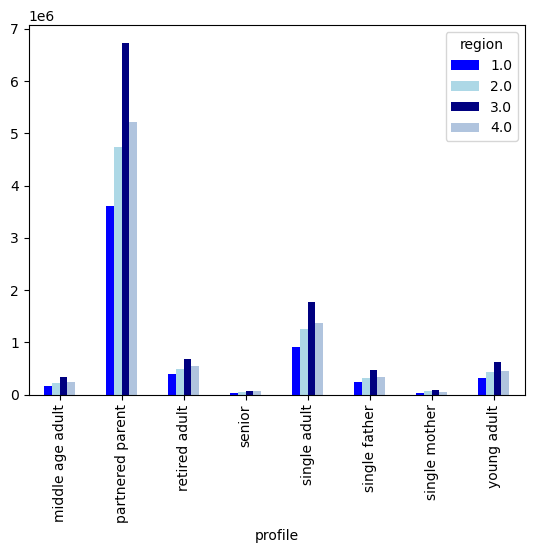

In [47]:
#create a bar graph to show the break down of the count of people of each profile in each region
regional_profile_bar=regional_ct.plot.bar(color=['blue','lightblue', 'navy', 'lightsteelblue'])

In [59]:
#partnered parents and single adults are the highest spenders in every region

In [58]:
#export
regional_profile_bar.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/regioncount_profile_bar.png'))

In [48]:
#create a bar chart that shows the counts of types of profiles per region instead of counts of people in each region by profile.
count_of_prof_per_region= pd.crosstab(df_draft_instacart['region'], df_draft_instacart['profile'])
count_of_prof_per_region

profile,middle age adult,partnered parent,retired adult,senior,single adult,single father,single mother,young adult
region,,,,,,,,
1.0,165340,3609683,395847,40515,917242,241774,39709,312626
2.0,227117,4746553,492762,51068,1258799,319761,63892,437373
3.0,343685,6731864,691055,73788,1780810,469291,82034,619358
4.0,251669,5213978,540420,63609,1368840,346968,58999,448430


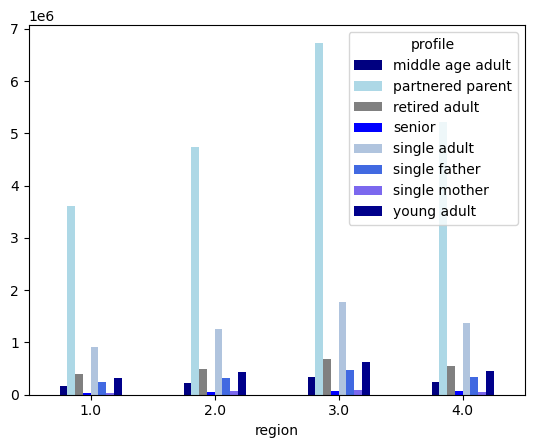

In [56]:
profile_by_region_bar=count_of_prof_per_region.plot.bar( rot=0, color=['navy','lightblue', 'gray','blue', 'lightsteelblue', 'royalblue', 'mediumslateblue', 'darkblue'])

In [60]:
#partnered parents and single adults are top spenders in each of the regions 

In [61]:
#export
profile_by_region_bar.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/profilecount_region_bar.png'))

In [62]:
df_dep

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [63]:
#Create a crosstab to analyze the relationship between profiles and departments 
prof_by_dep= pd.crosstab(df_draft_instacart['department_id'], df_draft_instacart['profile'])

In [64]:
prof_by_dep

profile,middle age adult,partnered parent,retired adult,senior,single adult,single father,single mother,young adult
department_id,,,,,,,,
1,66627,1410139,148333,14407,363585,89612,16297,125743
2,1065,22485,2291,233,6173,1518,407,2119
3,35295,743119,76021,7165,194004,43502,7862,65460
4,271745,6050539,623025,54800,1562611,336887,59652,520032
5,4826,92168,9764,1421,26503,7159,1694,10161
6,7487,172636,17494,1233,44653,9096,1708,14946
7,93587,1609448,176427,28161,443417,157532,28050,151501
8,2130,61474,7024,613,16174,3543,695,6063
9,24599,561900,56303,4002,141042,26890,4545,47346


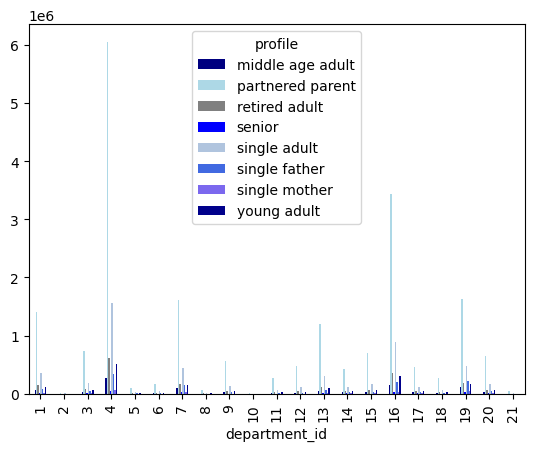

In [65]:
prof_by_dep_bar=prof_by_dep.plot.bar(color=['navy','lightblue', 'gray','blue', 'lightsteelblue', 'royalblue', 'mediumslateblue', 'darkblue'])

In [67]:
#Top spenders and majority of our customers, partnered parents, spend most money on produce, dair/eggs, snacks, beverages, and frozen meals
#Second top spender, single adults, spend most on produce, snacks, dairy/eggs, and frozen meals
#Both have very similair spending habits
#Other profiles follow the same spending habits trend

In [68]:
#export
prof_by_dep_bar.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/prof_by_dep_bar.png'))

In [69]:
#tying regions, departments, and profiles together and alayzing the spending habits in each department of each profile per region


In [70]:
#creating dataframes per region for crosstab use
df_r1= df_draft_instacart.loc[df_draft_instacart['region']==1]
df_r2=df_draft_instacart.loc[df_draft_instacart['region']==2]
df_r3=df_draft_instacart.loc[df_draft_instacart['region']==3]
df_r4=df_draft_instacart.loc[df_draft_instacart['region']==4]

In [71]:
#creating crosstabs between the departments and profiles using the regional data frames 
r1_ct=pd.crosstab(df_r1['department_id'], df_r1['profile'])
r2_ct=pd.crosstab(df_r2['department_id'], df_r2['profile'])
r3_ct=pd.crosstab(df_r3['department_id'], df_r3['profile'])
r4_ct=pd.crosstab(df_r4['department_id'], df_r4['profile'])

In [73]:
#after checking that each crosstab was created accurately, create representative bar graphs

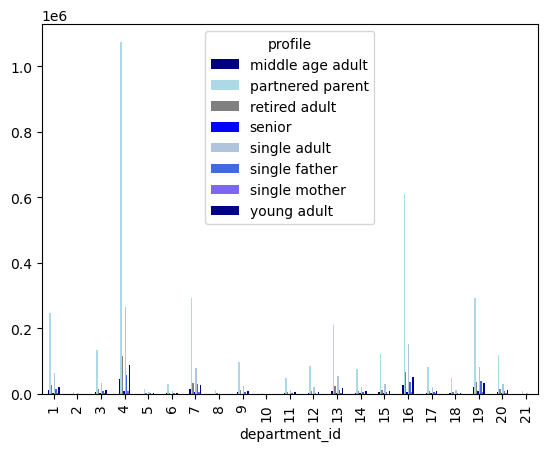

In [76]:
r1_dep_prof_bar= r1_ct.plot.bar(color=['navy','lightblue', 'gray','blue', 'lightsteelblue', 'royalblue', 'mediumslateblue', 'darkblue'])

In [80]:
#export
r1_dep_prof_bar.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/r1_dep_prof_bar.png'))


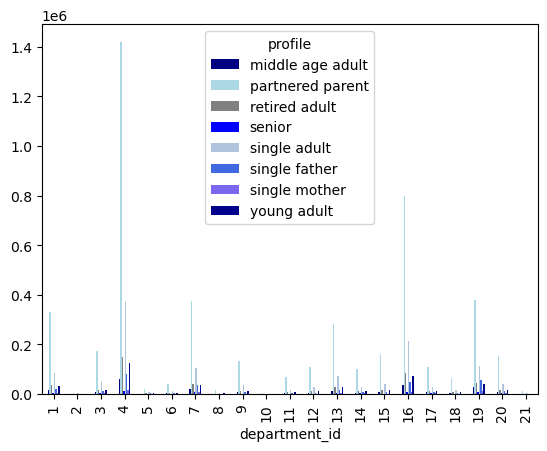

In [77]:
r2_dep_prof_bar= r2_ct.plot.bar(color=['navy','lightblue', 'gray','blue', 'lightsteelblue', 'royalblue', 'mediumslateblue', 'darkblue'])

In [81]:
#export
r2_dep_prof_bar.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/r2_dep_prof_bar.png'))

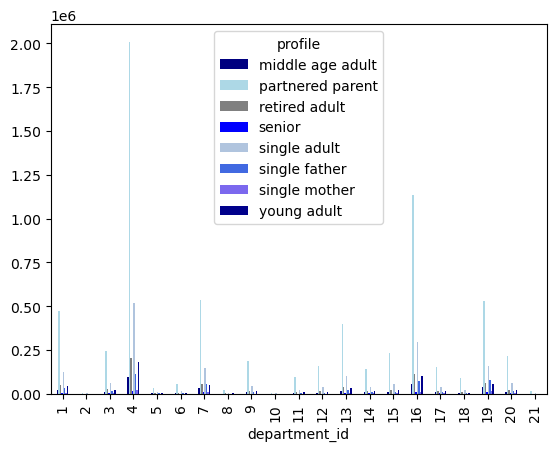

In [78]:
r3_dep_prof_bar= r3_ct.plot.bar(color=['navy','lightblue', 'gray','blue', 'lightsteelblue', 'royalblue', 'mediumslateblue', 'darkblue'])

In [82]:
#export
r3_dep_prof_bar.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/r3_dep_prof_bar.png'))

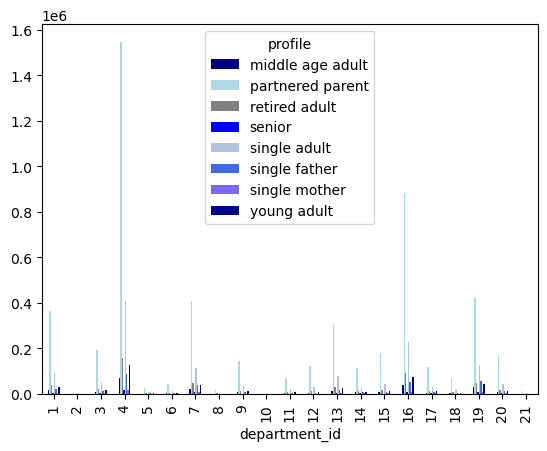

In [79]:
r4_dep_prof_bar= r4_ct.plot.bar(color=['navy','lightblue', 'gray','blue', 'lightsteelblue', 'royalblue', 'mediumslateblue', 'darkblue'])

In [83]:
#export
r4_dep_prof_bar.figure.savefig(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/04 Analysis/Visualizations/r4_dep_prof_bar.png'))

In [97]:
df_draft_instacart.shape

(32404859, 36)

# Exporting Final Version of Data Frame

In [93]:
df_draft_instacart.to_pickle(os.path.join('/Users/jessicagiron/Desktop/Instacart Basket Analysis 2023/02 Data/Prepared Data/df_instacart.pkl'))
